全局变量

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
WindProducePrice = 0.5 #风电成本 元/kwh
LightProducePrice = 0.4 #光电成本 元/kwh
BuyInPrice = 1 #主电网购入成本 元/kwh
batteryCapacity = 100 #电池容量 kwh
batteryPower = 50 #电池功率 kw

#数据预处理#

In [2]:
data1 = pd.read_excel('A题附件1：各园区典型日负荷数据.xlsx')
data1

,时间（h）,园区A负荷(kW),园区B负荷(kW),园区C负荷(kW),Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,00:00:00,275,241,302,NaN,NaN,NaN,NaN
1,01:00:00,275,253,292,NaN,NaN,NaN,NaN
2,02:00:00,277,329,307,NaN,NaN,NaN,NaN
3,03:00:00,310,315,293,NaN,NaN,NaN,NaN
4,04:00:00,310,290,271,NaN,NaN,NaN,NaN
5,05:00:00,293,270,252,NaN,NaN,NaN,NaN
6,06:00:00,293,307,283,NaN,NaN,NaN,NaN
7,07:00:00,380,354,223,NaN,NaN,NaN,NaN
8,08:00:00,375,264,292,NaN,NaN,NaN,NaN
9,09:00:00,281,315,283,NaN,NaN,NaN,NaN


In [3]:
data2 = pd.read_excel('data2.xlsx')#读入数据，附件2
data2 = data2.iloc[30:,]
data2 = data2.reset_index(drop=True)
data2

,说明：表中数据标幺值以相应的风/光额定装机容量为基准,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,00:00:00,0,230.1,0,73.2,73.2,303.3,818,514.7
1,01:00:00,0,382.8,0,108.75,108.75,491.55,820,328.45
2,02:00:00,0,296.8,0,197.95,197.95,494.75,913,418.25
3,03:00:00,0,444.4,0,91.55,91.55,535.95,918,382.05
4,04:00:00,0,502.9,0,235.8,235.8,738.7,871,132.3
5,05:00:00,0,360.9,0,310.75,310.75,671.65,815,143.35
6,06:00:00,0,240.2,0,147.3,147.3,387.5,883,495.5
7,07:00:00,4.35,47.3,6.3,60.7,67,118.65,957,838.35
8,08:00:00,226.95,153.8,196.8,12.5,209.3,590.05,931,340.95
9,09:00:00,451.5,106.8,378.84,151.15,529.99,1088.29,879,-209.29


In [4]:
LightProduceByA = data2['Unnamed: 1'].values.tolist()
WinProduceByB = data2['Unnamed: 2'].values.tolist()
LightProduceByC = data2['Unnamed: 3'].values.tolist()
WinProduceByC = data2['Unnamed: 4'].values.tolist()
LoadA = data1['园区A负荷(kW)'].values.tolist()
LoadB = data1['园区B负荷(kW)'].values.tolist()
LoadC = data1['园区C负荷(kW)'].values.tolist()

#第一问第一小问：

In [49]:
EA_buy = np.maximum((np.array(LoadA) - np.array(LightProduceByA)), 0) #shape(24,)
EA_curt = np.maximum((np.array(LightProduceByA) - np.array(LoadA)), 0)
A_LightProduce = np.array(LightProduceByA)

EB_buy = np.maximum((np.array(LoadB) - WinProduceByB), 0)
EB_curt = np.maximum((np.array(WinProduceByB) - np.array(LoadB)), 0)
B_WindProduce = np.array(WinProduceByB)

EC_buy = np.maximum((np.array(LoadC) - np.array(LightProduceByC) - np.array(WinProduceByC)), 0)
EC_curt = np.maximum((np.array(LightProduceByC) + np.array(WinProduceByC) - np.array(LoadC)), 0)
C_LightProduce = np.array(LightProduceByC)
C_WindProduce = np.array(WinProduceByC)

def Compute_Single_Cost(E_buy, E_curt, LightProduce, LightPrice, WindProduce, WindPrice):
    #array : E_buy, E_curt
    #const : LPro, LPri, WPro, WPri
    return E_buy * BuyInPrice + WindProduce * WindPrice + LightProduce * LightPrice

ACost = Compute_Single_Cost(EA_buy, EA_curt, A_LightProduce, LightProducePrice, 0, WindProducePrice)
BCost = Compute_Single_Cost(EB_buy, EB_curt, 0, A_LightProduce, B_WindProduce, WindProducePrice)
CCost = Compute_Single_Cost(EC_buy, EC_curt, C_LightProduce, LightProducePrice, C_WindProduce, WindProducePrice)

APer = ACost.sum() / np.sum(LoadA)
BPer = BCost.sum() / np.sum(LoadB)
CPer = CCost.sum() / np.sum(LoadC)

APer, BPer, CPer

(0.8182957853436275, 0.7159403372243839, 0.7037136059670783)

#第一问第二小问：

In [5]:
LightProduceByA

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 4.35,
 226.95,
 451.5,
 578.325,
 641.625,
 639.8249999999999,
 588.15,
 482.77500000000003,
 318.15000000000003,
 46.425,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [6]:
def calculate_costs(Produce,Loads,Price,TypedPrice):
    # 初始电池电量设置为电池最大容量的10%
    # 最大电池电量设置为电池最大容量的90%
    min_battery_Capacity = 0.1 * batteryCapacity
    max_battery_Capacity = 0.9 * batteryCapacity
    CurrentBatteryCapacity = 0 #初始化电池容量
    TotalData = pd.DataFrame(columns=[
        '时间', 
        '电池电量', 
        '负荷-发电', 
        '买电花费',
        '产电成本',
        '总花费'
        ])
    FirstFlag = True
    iteration = 0
    totalcost = 0
    for PowerProduce,Load in zip(Produce,Loads):#PowerProduce为发电量，Load为负荷量
        Demand = Load-PowerProduce #需电量
        BuyInElcCost = 0 #初始化购电费用
        ProduceElcCost = 0 #初始化发电费用
        # 判断负荷量是否大于发电量
        if Demand>0:#需要放电
            if CurrentBatteryCapacity>min_battery_Capacity:#判断电池是否可以放电
                if(Demand-(CurrentBatteryCapacity-min_battery_Capacity)*0.95>0):#判断是否需要额外买电
                    BuyInElcCost = (PowerProduce-(CurrentBatteryCapacity-min_battery_Capacity)*0.95)/Price
                    ProduceElcCost = PowerProduce*TypedPrice
                    CurrentBatteryCapacity = min_battery_Capacity
                else:
                    ProduceElcCost = PowerProduce*TypedPrice
                    CurrentBatteryCapacity = CurrentBatteryCapacity - Demand/0.95
            else:
                BuyInElcCost = Demand/Price
                ProduceElcCost = PowerProduce*TypedPrice
        else:#可以充电
            if (CurrentBatteryCapacity<max_battery_Capacity or FirstFlag):#判断电池是否可以充电
                FirstFlag = False
                if(abs(Demand)-(max_battery_Capacity-CurrentBatteryCapacity)/0.95>0):#判断是否浪费
                    ProduceElcCost = PowerProduce*TypedPrice
                    CurrentBatteryCapacity = max_battery_Capacity
                else:
                    ProduceElcCost = PowerProduce*TypedPrice
                    CurrentBatteryCapacity = CurrentBatteryCapacity + abs(Demand)*0.95
            else:
                ProduceElcCost = PowerProduce*TypedPrice
        totalcost += BuyInElcCost+ProduceElcCost
         # 记录每次循环的数据
        new_row = pd.DataFrame({
        '时间':[iteration],
        '电池电量':[CurrentBatteryCapacity],
        '负荷-发电':[Demand],
        '买电花费':[BuyInElcCost],
        '产电成本':[ProduceElcCost],
        '总花费':[totalcost]
        })
        TotalData = pd.concat([TotalData,new_row], ignore_index=False)
        iteration +=1
    return totalcost

In [ ]:
def calculate_costs_for_multy(LightProduce,WindProduce,Loads,Price,LightTypedPrice,WindTypedPrice):
    # 初始电池电量设置为电池最大容量的10%
    # 最大电池电量设置为电池最大容量的90%
    min_battery_Capacity = 0.1 * batteryCapacity
    max_battery_Capacity = 0.9 * batteryCapacity
    CurrentBatteryCapacity = 0 #初始化电池容量
    TotalData = pd.DataFrame(columns=[
        '时间', 
        '电池电量', 
        '负荷-发电', 
        '买电花费',
        '产电成本',
        '总花费'
        ])
    FirstFlag = True
    iteration = 0
    totalcost = 0
    for LightPowerProduce,WindPowerProduce,Load in zip(LightProduce,WindProduce,Loads):#PowerProduce为发电量，Load为负荷量
        PowerProduce = (LightPowerProduce+WindPowerProduce)
        Demand = Load-(LightPowerProduce+WindPowerProduce) #需电量
        BuyInElcCost = 0 #初始化购电费用
        ProduceElcCost = 0 #初始化发电费用
        # 判断负荷量是否大于发电量
        if Demand>0:#需要放电
            if CurrentBatteryCapacity>min_battery_Capacity:#判断电池是否可以放电
                if(Demand-(CurrentBatteryCapacity-min_battery_Capacity)*0.95>0):#判断是否需要额外买电
                    BuyInElcCost = (PowerProduce-(CurrentBatteryCapacity-min_battery_Capacity)*0.95)/Price
                    ProduceElcCost = (LightPowerProduce*LightTypedPrice)+(WindPowerProduce*WindTypedPrice)
                    CurrentBatteryCapacity = min_battery_Capacity
                else:
                    ProduceElcCost = (LightPowerProduce*LightTypedPrice)+(WindPowerProduce*WindTypedPrice)
                    CurrentBatteryCapacity = CurrentBatteryCapacity - Demand/0.95
            else:
                BuyInElcCost = Demand/Price
                ProduceElcCost = (LightPowerProduce*LightTypedPrice)+(WindPowerProduce*WindTypedPrice)
        else:#可以充电
            if (CurrentBatteryCapacity<max_battery_Capacity or FirstFlag):#判断电池是否可以充电
                FirstFlag = False
                if(abs(Demand)-(max_battery_Capacity-CurrentBatteryCapacity)/0.95>0):#判断是否浪费
                    ProduceElcCost = (LightPowerProduce*LightTypedPrice)+(WindPowerProduce*WindTypedPrice)
                    CurrentBatteryCapacity = max_battery_Capacity
                else:
                    ProduceElcCost = (LightPowerProduce*LightTypedPrice)+(WindPowerProduce*WindTypedPrice)
                    CurrentBatteryCapacity = CurrentBatteryCapacity + abs(Demand)*0.95
            else:
                ProduceElcCost = (LightPowerProduce*LightTypedPrice)+(WindPowerProduce*WindTypedPrice)
        totalcost += BuyInElcCost+ProduceElcCost
         # 记录每次循环的数据
        new_row = pd.DataFrame({
        '时间':[iteration],
        '电池电量':[CurrentBatteryCapacity],
        '负荷-发电':[Demand],
        '买电花费':[BuyInElcCost],
        '产电成本':[ProduceElcCost],
        '总花费':[totalcost]
        })
        TotalData = pd.concat([TotalData,new_row], ignore_index=False)
        iteration +=1
    return totalcost

In [8]:
calculate_costs(LightProduceByA,LoadA,BuyInPrice,LightProducePrice)

6622.655000000001

In [9]:
calculate_costs(WinProduceByB,LoadB,BuyInPrice,WindProducePrice)

5184.700000000001

In [10]:
calculate_costs_for_multy(LightProduceByC,WinProduceByC,LoadC,BuyInPrice,LightProducePrice,WindProducePrice)

出力:73.2,需求:302
出力:108.75,需求:292
出力:197.95,需求:307
出力:91.55000000000001,需求:293
出力:235.8,需求:271
出力:310.75,需求:252
出力:147.29999999999998,需求:283
出力:67.0,需求:223
出力:209.3,需求:292
出力:529.99,需求:283
出力:485.96,需求:287
出力:596.7,需求:362
出力:706.69,需求:446
出力:625.9100000000001,需求:504
出力:461.02,需求:455
出力:338.15,需求:506
出力:145.21,需求:283
出力:170.4,需求:311
出力:159.15,需求:418
出力:164.95000000000002,需求:223
出力:85.15,需求:229
出力:82.75,需求:361
出力:94.85000000000001,需求:302
出力:116.15,需求:291


5534.4551249999995

#第一问第三小问

In [ ]:
st_c = 50
end_c = 250
step_c = 1
st_p = 50
end_p = 300
step_p = 1
CapacityRange = np.arange(st_c,end_c,step_c)
PowerRange = np.arange(st_p,end_p,step_p)
TotalCost_Q_1_3 = np.zeros((len(CapacityRange), len(PowerRange)))
x=-1
for batteryCapacity in CapacityRange:
    x+=1
    y=-1
    for batteryPower in PowerRange:
        y+=1
        TotalCost_Q_1_3[x,y] = (calculate_costs(LightProduceByA,LoadA,BuyInPrice,LightProducePrice) + 
                               calculate_costs(WinProduceByB,LoadB,BuyInPrice,WindProducePrice) + 
                              calculate_costs_for_multy(LightProduceByC,WinProduceByC,LoadC,BuyInPrice,LightProducePrice,WindProducePrice))


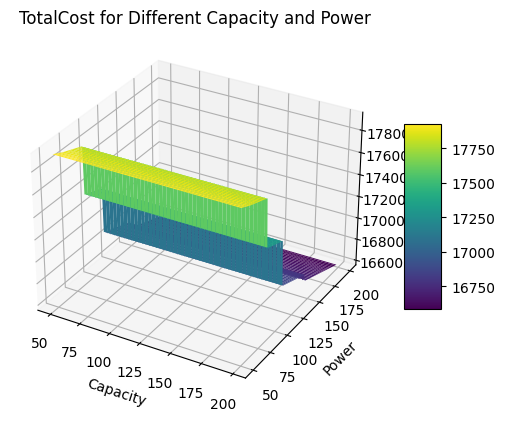

In [44]:
def Plot_3D(X, Y, Z):
    X, Y = np.meshgrid(X, Y)
    Z = np.array(Z)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X,Y,Z,cmap='viridis')
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
    ax.set_xlabel('Capacity')
    ax.set_ylabel('Power')
    ax.set_zlabel('TotalCost')
    ax.set_title('TotalCost for Different Capacity and Power')
    plt.show()

Plot_3D(CapacityRange, PowerRange, TotalCost_Q_1_3)